In [2]:
# Flight Prediction

In [3]:
#import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import datetime
from datetime import datetime, timedelta
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()

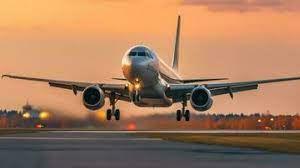

In [4]:
from IPython.display import Image
Image("Flightpic.jpeg")

In [5]:
data = pd.read_excel("Data_Train.xlsx")

In [6]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
data.shape

(10683, 11)

In [9]:
data.size

117513

In [10]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
# to see the statistical parameters of categorical columns
data.describe(include=["O"])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [13]:
# to see the statistical parameters of numerical columns
data.describe(include=["int64"])

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

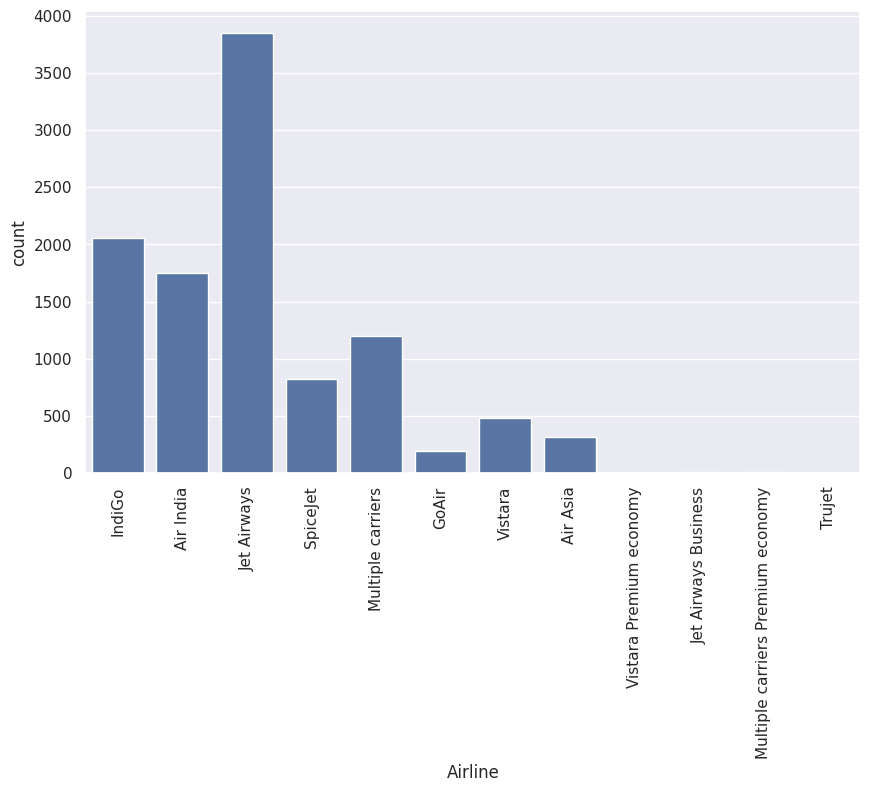

In [15]:
##################### EDA ##################
# Univariate
plt.figure(figsize=(10,6))
sns.countplot(x="Airline",data=data)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

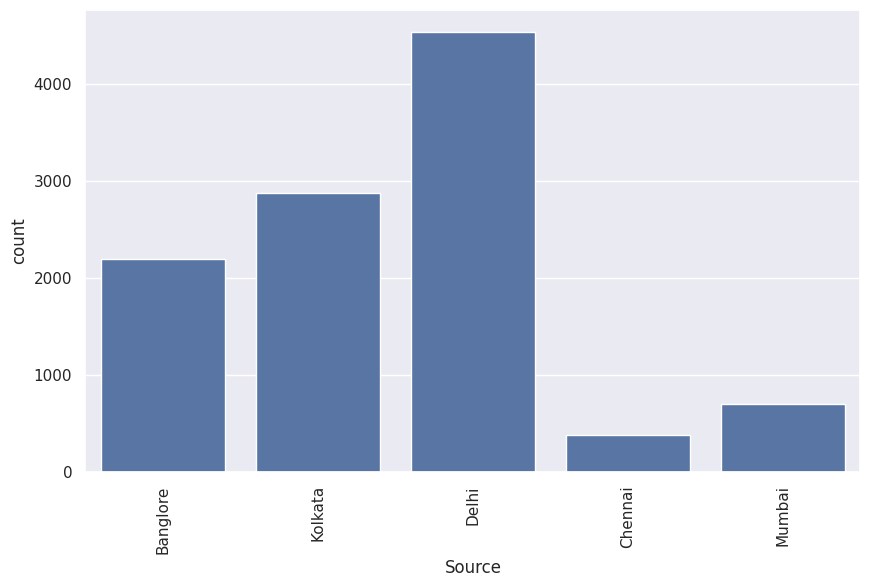

In [16]:
# Jet Airways is the costliest among all the flights
# Jet Airways has the highest share followed by Indigo
plt.figure(figsize=(10,6))
sns.countplot(x="Source", data=data)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

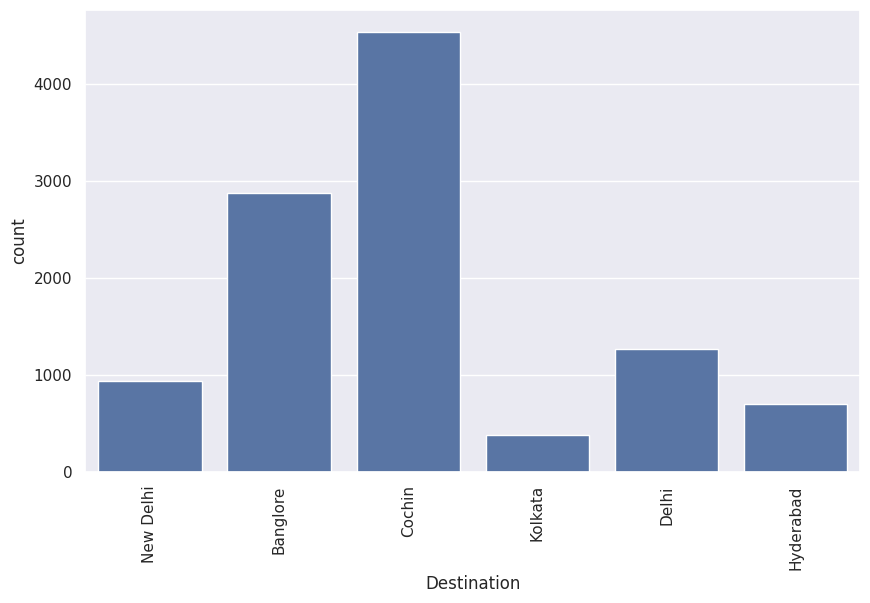

In [17]:
# Delhi has highest take off or originating point for all the point for all the flights followed by Kolkata and Banglore respectively.
plt.figure(figsize=(10,6))
sns.countplot(x="Destination", data=data)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

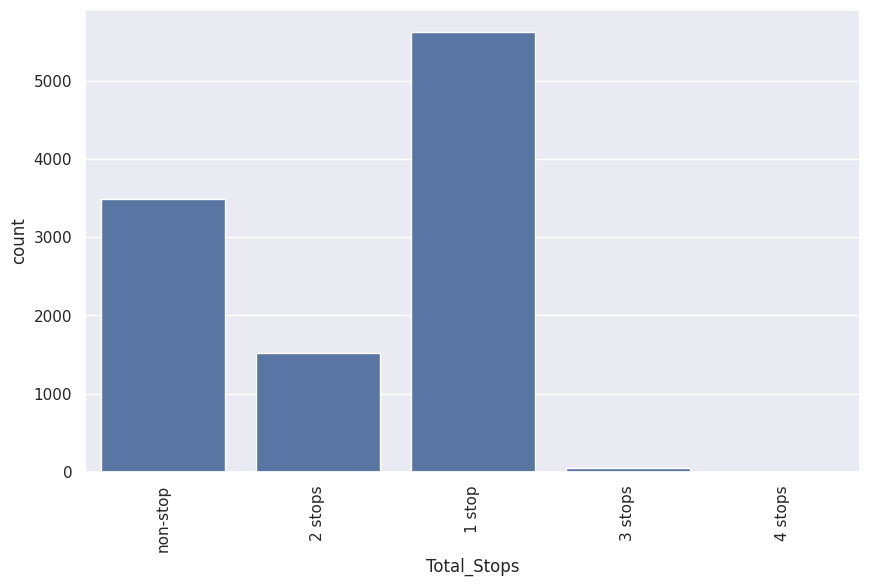

In [18]:
# Cochin has the highest landing or arrive of the flights from different places followed by Banglore
plt.figure(figsize=(10,6))
sns.countplot(x="Total_Stops", data=data)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

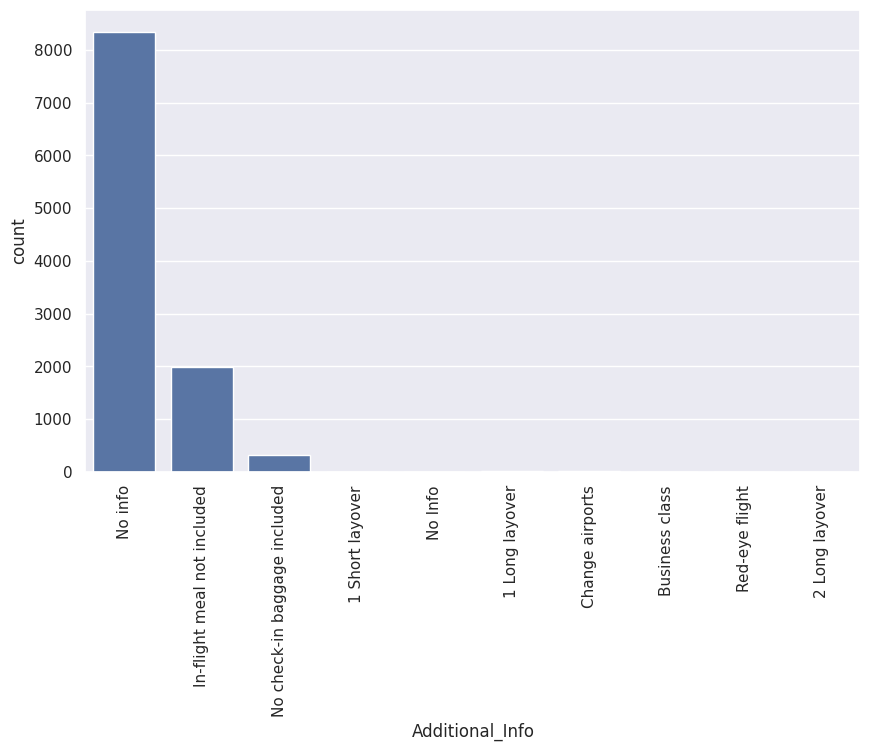

In [19]:
# Most flights have single stop in between taking off and landing at the destination followed by non-stop
plt.figure(figsize=(10,6))
sns.countplot(x="Additional_Info", data=data)
plt.xticks(rotation=90)

In [20]:
# Most of the flights do not have any extra information
# There are few flights with extra information of "in-flight meal not included"

# sweetviz is used for univariate
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 40.8 MB/s eta 0:00:00


In [21]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html("my_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights

The majority of prices are within the 20,000 range, but there are some outliers.
The most frequent airline is Jet Airways. However, Jet Airways Business has a much higher average price than the other lines.
The most flights depart from Delhi, and the average price is the hightest
Cochin is the most heavily traficked destination. New Delhi, on the other hand, has the highest average price.
Alittle more than half of the flights make single stop between the origin and destination, around one-third is direct flight

# BYVARIATE

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

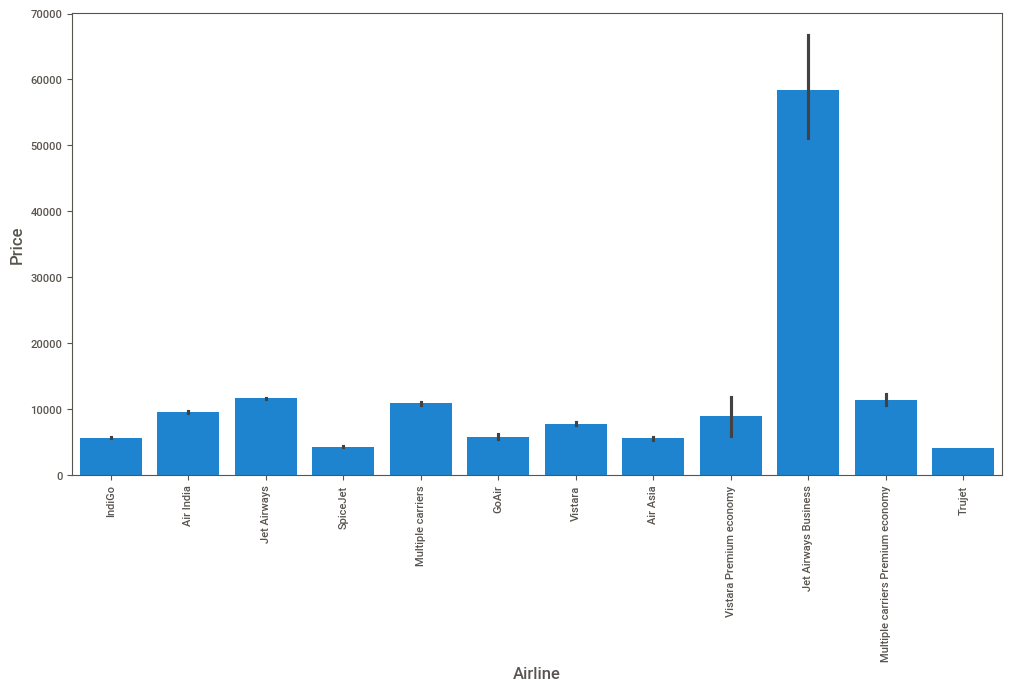

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x="Airline", y="Price", data=data)
plt.xticks(rotation=90)

Jet Airways Business has the highest price when compared to others

# Data Preprocessing

In [23]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [24]:
data.dropna(inplace=True)

In [25]:
data.shape

(10682, 11)

In [26]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Extracting Date and Month from Date of Journey Column

In [27]:
# Date
data["Journey_Date"] = pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.day

In [28]:
# Month
data["Journey_Month"] = pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [29]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Since we hace extracted Date of Journey column into Date and Month, Now we can drop it as Original Date of Journey column is of no use.

In [30]:
data.drop(['Date_of_Journey'], axis=1, inplace=True)

Departure time is when a plane leaves the source.   
Similar to Date of Journey we can ectract values from Departure Time.
So we will be extracting Hour and Minutes fro Departure Time Column.

In [31]:
# Hours
data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour

In [32]:
# Extracting Minutes
data["Dep_min"] = pd.to_datetime(data['Dep_Time']).dt.minute

In [33]:
# Now we will drop the dep_time as we don't need it anymore
data.drop(['Dep_Time'],axis=1, inplace=True)

In [34]:
data.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Arrival time when a plane reaches the destination.
Similar to Date of Journey we can extract values from Arrival Time.
So we will be extracting Hour and Minutes from Arrival Time Column.

In [35]:
# Extracting Hours
data['Arrival_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour

# Extracting minutes
data["Arrival_min"] = pd.to_datetime(data['Arrival_Time']).dt.minute

# Now we will drop the Arrival Time, no use
data.drop(['Arrival_Time'],axis=1 ,inplace=True)

In [36]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25


# "Duration column:

Here we are trying to extract the hours and minutes fro the feature "Duration"

In [37]:
# Assigning and converting Duration column into list to exract hours and minutes separately

duration = list(data["Duration"])
for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if "h" in duration[i]:
      duration[i] = duration[i].strip() + " 0m "    # adds 0 minute
    else:
      duration[i] = " 0h " + duration[i]    # Adds 0 hour

duration_hours  = []
duration_mins = []
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = "h")[0]))   #Extracting hours from duration
  duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

Adding "duration_hours" and "duration_mins" list to data frame and dropping the column "duration" from it.

In [38]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

#we will remove the Duration column
data.drop(['Duration'], axis=1, inplace=True)

In [39]:
data.head(4)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25


In [40]:
data.shape

(10682, 15)

# Converting categorical columns to numerical using One Hot Encoder

In [41]:
cat_col = data.select_dtypes(include=["O"])
cat_col.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


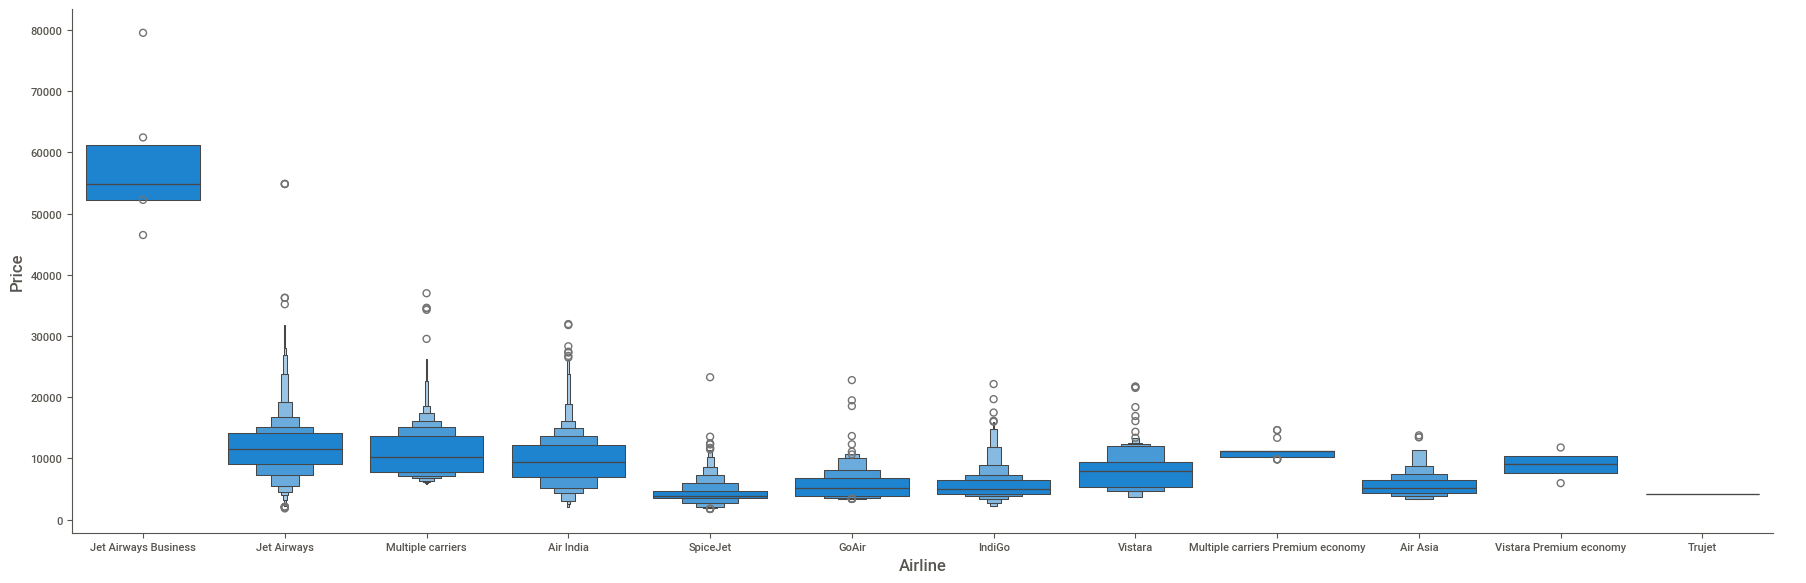

In [42]:
# Airline vs Price
sns.catplot(x="Airline", y="Price", data=data.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=3)
plt.show()

From the above graph we can understand that JetAirways has the highest price and rest are quite in the same range

In [43]:
data2 = data.copy()

In [44]:
# OneHotEncoding
df1 = pd.get_dummies(data2["Airline"], drop_first=True)
data2 = pd.concat([data2,df1], axis=1).drop(["Airline"], axis=1)

In [45]:
data2.head(3)

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,...,0,0,1,0,0,0,0,0,0,0


In [46]:
# OneHotEncoding
df2 = pd.get_dummies(data2["Source"], drop_first = True)
data2 = pd.concat([data2, df2], axis=1).drop(["Source"], axis=1)

In [47]:
data2.head(3)

,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_hour,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,...,0,0,0,0,0,0,0,1,0,0


In [48]:
# OneHotEncoding
df3 = pd.get_dummies(data2["Destination"], drop_first = True)
data2 = pd.concat([data2, df3], axis = 1).drop(["Destination"], axis = 1)

In [49]:
data2.head(4)

,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0


In [50]:
# droping column, because Additional_info since 80% has no information
# Route ---->>> is related to no of stops
data2.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [51]:
data2.head(5)

,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,non-stop,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


<Axes: xlabel='Total_Stops', ylabel='count'>

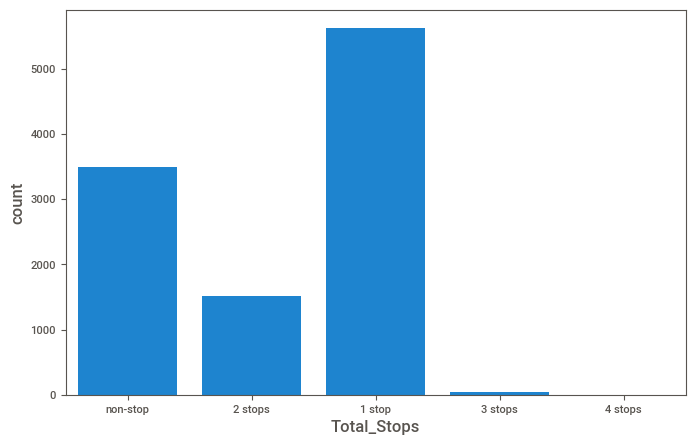

In [52]:
plt.figure(figsize = (8,5))
sns.countplot(data=data, x='Total_Stops')

In [53]:
data2['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [54]:
# Based on the observation from abive countplot and value counts we can manually encode the total_stop column

data2.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)
df=data2
df.head()

,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [55]:
x =  df.drop("Price", axis=1)
x.head()

,Total_Stops,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


# Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
print(x)

[[0.         0.88461538 0.         ... 0.         0.         1.        ]
 [0.5        0.         0.66666667 ... 0.         0.         0.        ]
 [0.5        0.30769231 1.         ... 0.         0.         0.        ]
 ...
 [0.         1.         0.33333333 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.5        0.30769231 0.66666667 ... 0.         0.         0.        ]]


#Feature Engineering

In [57]:
data2 = df.iloc[0:10, 0:10]
data2

,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45
5,0,3873,24,6,9,0,11,25,2,25
6,1,11087,12,3,18,55,10,25,15,30
7,1,22270,1,3,8,0,5,5,21,5
8,1,11087,12,3,8,55,10,25,25,30
9,1,8625,27,5,11,25,19,15,7,50


In [58]:
data2.corr()

,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Total_Stops,1.000000,0.415321,-0.639003,0.253185,-0.502264,0.405355,0.112469,0.088946,0.430101,-0.490055
Price,0.415321,1.000000,-0.659511,-0.366571,-0.333911,0.031325,-0.193463,-0.203835,0.703591,-0.542767
Journey_Date,-0.639003,-0.659511,1.000000,0.267372,0.305646,-0.319999,-0.071263,-0.117263,-0.378853,0.487520
Journey_Month,0.253185,-0.366571,0.267372,1.000000,-0.400946,-0.399323,0.166297,0.162142,-0.271248,-0.332520
Dep_hour,-0.502264,-0.333911,0.305646,-0.400946,1.000000,-0.020904,0.080281,0.201823,-0.438518,0.528181
Dep_min,0.405355,0.031325,-0.319999,-0.399323,-0.020904,1.000000,0.116379,0.322526,0.239471,0.304109
Arrival_hour,0.112469,-0.193463,-0.071263,0.166297,0.080281,0.116379,1.000000,0.573010,-0.393844,0.362001
Arrival_min,0.088946,-0.203835,-0.117263,0.162142,0.201823,0.322526,0.573010,1.000000,-0.134939,0.080203
Duration_hours,0.430101,0.703591,-0.378853,-0.271248,-0.438518,0.239471,-0.393844,-0.134939,1.000000,-0.585949
Duration_mins,-0.490055,-0.542767,0.487520,-0.332520,0.528181,0.304109,0.362001,0.080203,-0.585949,1.000000


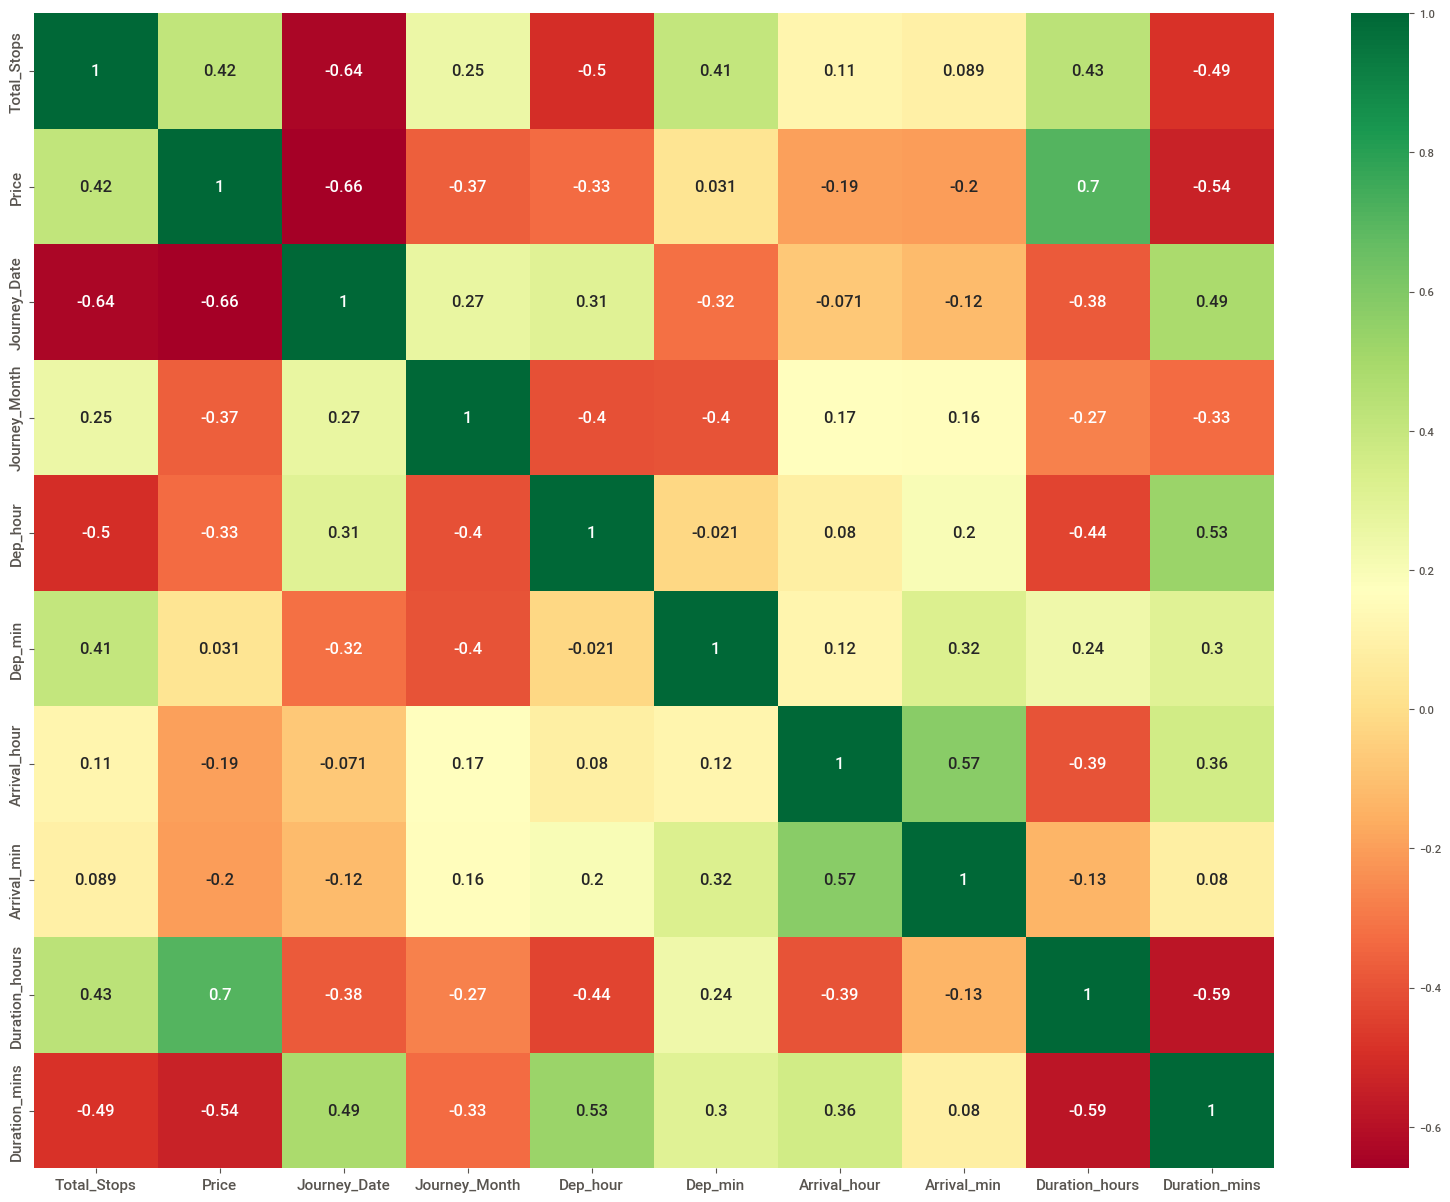

In [59]:
# Heatmap - to find the correlation between independent to independent and independent to dependent variables

plt.figure(figsize=(20,15))
sns.heatmap(data2.corr(), annot = True, cmap = "RdYlGn")
plt.tick_params(labelsize = 11)

we have to drop the column if the independent columns are highly related but we don't have any.                                
We see that there are few cells which shows high correlation but thats between independent and dependent columns.

# Model Creation

In [60]:
# for the model creation we have to separate the independent and dependent
x = df.drop("Price", axis=1)
y = df["Price"]

In [61]:
# creating training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

In [62]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8011, 29)
(8011,)
(2671, 29)
(2671,)


# 1. Linear Regression

In [63]:
## importing the model library
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [65]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

7835152.9499018425
1949.4583561151055


In [66]:
import math
rmse = math.sqrt(mae)
print(rmse)

44.152670996386


In [67]:
lr_score = r2_score(y_test, y_pred)
lr_score

0.6198931301596473

In [68]:
# Adjusting r2 score
adj_r2 = 1-(1-lr_score) * (2671-1) / (2671-13-1)
adj_r2

0.6180333675296419

#2. KNN

In [69]:
# for the model creation we have to separate the independent and dependent
x = df.drop("Price", axis=1)
y = df["Price"]

In [70]:
from sklearn.model_selection import train_test_split    #splitting the training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [71]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

In [72]:
(y_test != y_pred).sum()

2639

In [73]:
len(y_test)

2671

In [74]:
(y_test != y_pred).sum()/len(y_test)

0.9880194683639086

In [75]:
# Taking optimal k to determine how many nearest neighbors to create
# Create a list to store the error values for each k
ERROR_RATE = []
for i in range(1, 13):
  KNN = KNeighborsRegressor(n_neighbors = i)
  KNN.fit(x_train, y_train)
  y_pred = KNN.predict(x_test)
  error_rate = (y_test != y_pred).sum()/len(y_test)
  ERROR_RATE.append(error_rate)

In [76]:
ERROR_RATE

[0.7865967802321228,
 0.9183826282291276,
 0.9591913141145638,
 0.9790340696368401,
 0.9880194683639086,
 0.9962560838637214,
 0.9970048670909771,
 0.9992512167727443,
 0.9996256083863722,
 1.0,
 1.0,
 0.9996256083863722]

Text(0, 0.5, 'Error Rate')

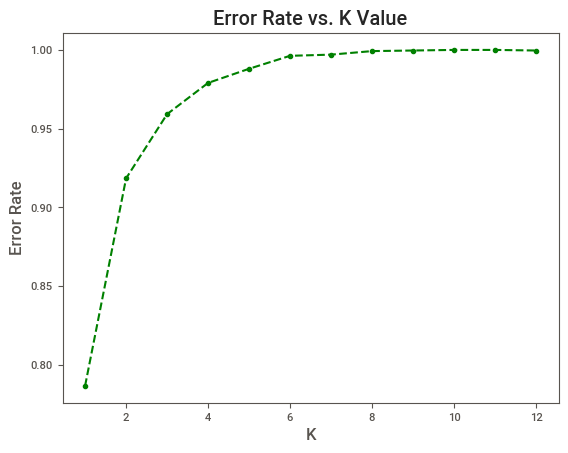

In [77]:
# Lets plot the k-values and error rate
plt.plot(range(1, 13), ERROR_RATE, color='green', marker='o', linestyle = '--')
plt.title('Error Rate vs. K Value')
plt.xlabel("K")
plt.ylabel('Error Rate')

In [78]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=4)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [80]:
mse = mean_squared_error(y_test, y_pred)
mse

8908715.681299139

In [81]:
mae = mean_absolute_error(y_test, y_pred)
mae

1845.3384500187196

In [82]:
knn_score = r2_score(y_test, y_pred)
knn_score

0.5678113683844929

In [83]:
adj_r2 = 1-(1-knn_score) * (2671-1) / (2671-13-1)
adj_r2

0.5656967834349251

# 3. Decision Tree

In [84]:
# for the model creation we have to separate the independent and dependent
x =df.drop('Price', axis=1)
y = df["Price"]

In [85]:
from sklearn.model_selection import train_test_split     # preparing training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 42)

In [86]:
from sklearn.tree import DecisionTreeRegressor  #imorting decision tree from sklearn.tree
dt = DecisionTreeRegressor()      # Object creation for decision tree
dt.fit(x_train, y_train)          # training the model
y_pred = dt.predict(x_test)       # prediction

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [88]:
mse = mean_squared_error(y_test, y_pred)
mse

6109087.751642539

In [89]:
mae = mean_absolute_error(y_test, y_pred)
mae

1370.2855360039937

In [90]:
dt_score = r2_score(y_test, y_pred)
dt_score

0.7036297520029937

In [91]:
adj_r2 = 1-(1-dt_score) * (2671-1) / (2671-13-1)
adj_r2

0.7021796905713185

#4. Random Forest

In [92]:
# for the model creation we have to separate the independent and dependent
x = df.drop("Price", axis=1)
y = df["Price"]

In [93]:
# Splitting the Data into Train and Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 42)

In [94]:
x.shape

(10682, 29)

In [95]:
y.shape

(10682,)

In [96]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [98]:
# Mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
MAE

1158.453552183735

In [99]:
# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred)
MSE

4119756.2467580256

In [100]:
# Root mean squared error
RMSE = np.sqrt(MSE)
RMSE

2029.71826782882

In [101]:
r2 = r2_score(y_test, y_pred)
r2

0.8001382153643789

In [102]:
adj_r2 = 1-(1-r2)*(2671-1)/(2671-13-1)
adj_r2

0.799160344381969

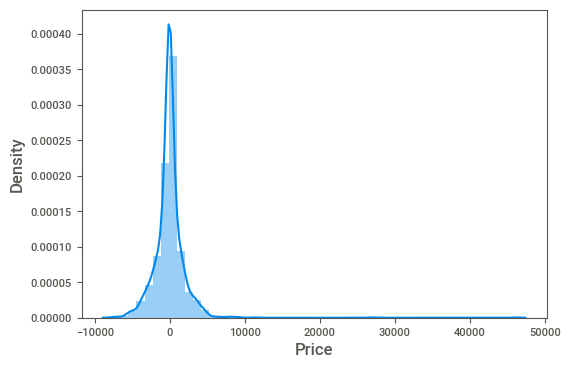

In [103]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-y_pred)
plt.show()

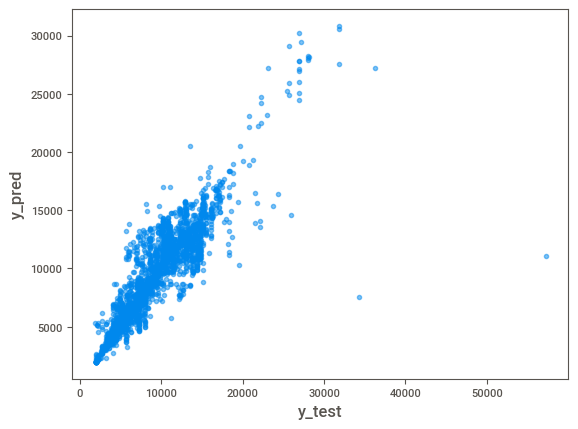

<Figure size 600x400 with 0 Axes>

In [104]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))
plt.show()

# Hyper Parameter Tuning

In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200,  num=12)]
max_features = ["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2,3,10,15,100]
min_samples_leaf = [1,2,5,10]

In [107]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [108]:
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, scoring ='neg_mean_squared_error', cv=5, n_iter=10, random_state=42)

In [109]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [110]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [111]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=500,
                                      min_samples_split = 10,
                                      min_samples_leaf = 1,
                                      max_features = 'auto',
                                      max_depth = 20)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [113]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

1129.8619034565384

In [114]:
MSE = mean_squared_error(y_test, y_pred)
MSE

3819506.3411211367

In [115]:
# Root mean squared error
RMSE = np.sqrt(MSE)
RMSE

1954.3557355612454

In [116]:
random_forest.score(x_train, y_train)

0.9106798128751128

In [117]:
random_forest.score(x_test, y_test)

0.8147042426686614

In [118]:
# R2 score
rf_score = r2_score(y_test, y_pred)
rf_score

0.8147042426686614

In [119]:
prediction = rf_random.predict(x_test)

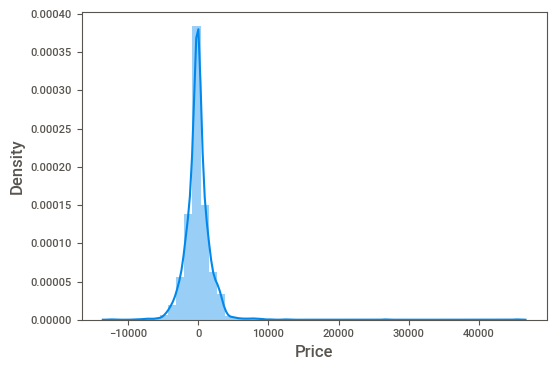

In [120]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-prediction)
plt.show()

From above we see that the normal distribution in the curve

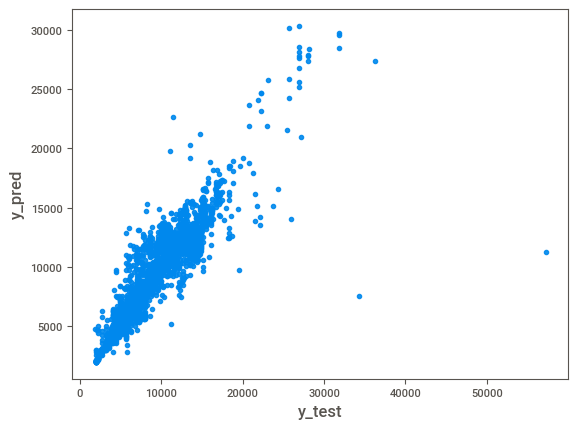

<Figure size 600x400 with 0 Axes>

In [121]:
plt.scatter(y_test, y_pred, alpha = 0.9)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))

plt.show()

We can see that the observation in linearly scattered

# Gradient Boosting

In [123]:
# for the model creation we have to separate the independent and dependent
x =df.drop("Price", axis=1)
y = df["Price"]

In [126]:
# Splitting the Data into Train and Test Split
from sklearn.model_selection import train_test_split
x_label, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [129]:
# importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators = 100)              # Object ceation
gbm.fit(x_train, y_train)           # Fitting the data
y_hat = gbm.predict(x_test)         # predicting the price

In [130]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [131]:
mse = mean_squared_error(y_test, y_hat)
mse

4307926.453776393

In [132]:
mae = mean_absolute_error(y_test, y_hat)
mae

1488.3607606161688

In [133]:
gb_score = r2_score(y_test, y_hat)
gb_score

0.7910095118350038

In [135]:
adj_r2 = 1-(1-gb_score)*(2671-1)/(2671-13-1)
adj_r2

0.7899869765146632

# Hyper ParameterTuning


In [136]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.01, 0.1, 0.2],
    'max_depth' : [3,4,5],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'subsample' : [0.8,0.9,1.0]
}

In [139]:
gb_regressor = GradientBoostingRegressor()

In [140]:
rsc = RandomizedSearchCV(estimator=gb_regressor, param_distributions=param_grid, scoring='neg_mean_squared_error', n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=2)


In [142]:
rsc.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [143]:
rsc.best_params_

{'subsample': 0.8,
 'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'learning_rate': 0.1}

In [145]:
# importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost = GradientBoostingRegressor(n_estimators= 300,
                                           min_samples_split = 10,
                                           min_samples_leaf = 2,
                                           subsample = 0.9,
                                           learning_rate = 0.1,
                                           max_depth = 5)
gradient_boost.fit(x_train, y_train)
y_hat = gradient_boost.predict(x_test)

In [147]:
# evaluating the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [148]:
mse = mean_squared_error(y_test, y_hat)
mse

3178881.2526444825

In [149]:
mae = mean_absolute_error(y_test, y_hat)
mae

1171.7350434679604

In [150]:
gbst_score = r2_score(y_test, y_hat)
gbst_score

0.8457828953355644

#Result

**Comparison of the Best Models Evaluated by Cross Validation**

LinearRegression - CV: 0.61
KNeighborsRegressor - CV: 0.56
DecisionTreeRegressor - CV: 0.70
RandomForestRegressor -CV: 0.81
GradientBoostingRegressor - CV: 0.84

In [154]:
scores = [lr_score, knn_score, dt_score,rf_score, gbst_score]
algorithms = ["Linear Regression", "KNN", "Decision Tree", "Random Forest", "Gradient Boosting"]

for i in range(len(algorithms)):
  print("The R2 score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The R2 score achieved using Linear Regression is: 0.6198931301596473 %
The R2 score achieved using KNN is: 0.5678113683844929 %
The R2 score achieved using Decision Tree is: 0.7036297520029937 %
The R2 score achieved using Random Forest is: 0.8147042426686614 %
The R2 score achieved using Gradient Boosting is: 0.8457828953355644 %


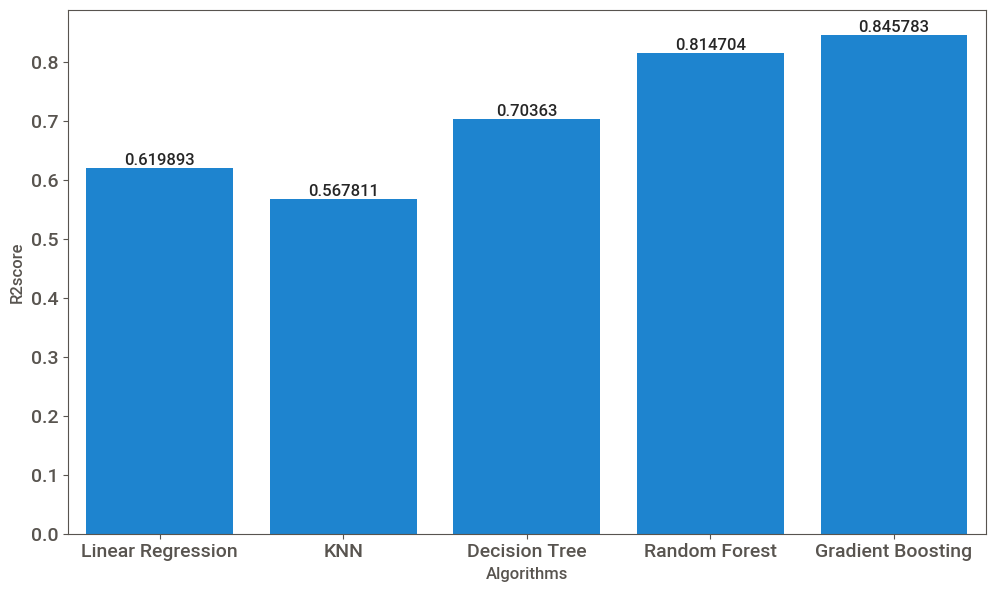

In [155]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2score")
ax = sns.barplot(x=algorithms, y=scores)
for label in ax.containers:
  ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=14)

# Conclusion
The best model is Gradient Boosting with a r2_score of 0.84.       
The second best model followed by Gradient Boosting is Random Forest with a r2_score of 0.81.                               
Some of the best features which has high impact on price are Total_Stops, Duration, Airline and Route